#  EFFECT OF TARIFF CHANGES ON THE ECONOMY

In [1]:
import pandas as pd

import numpy as np

from scipy.stats import pearsonr, linregress

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import statsmodels.formula.api as smf

import sqlite3

import seaborn as sns
sns.set_style("whitegrid", rc={'axes.linewidth': 2.5})
sns.set_context('notebook', font_scale=1.45, rc={"lines.linewidth": 3, "figure.figsize" : (7, 5)})

In [2]:
latam = pd.read_csv("data/clean_latam.csv")
g7 = pd.read_csv("data/clean_g7.csv")
gdp_cols = ['gdp', 'gdpdelta', 'gdp%change']
lforce_cols = ['lforce', 'lforcedelta', 'lforce%change']
unemp_cols = ['unemp', 'unempdelta', 'unemp%change']
inflation_cols = ['inflation', 'inflationdelta', 'inflation%change']

In [3]:
label_size = 8
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
mpl.rcParams['axes.labelsize'] = label_size 

def economiclines(source, indicator):

    axig = sns.regplot(data = source, x = "Intermediate goods_delta", y = indicator, ax=axes[0,0])
    axkg = sns.regplot(data = source, x = "Capital goods_delta", y = indicator, ax=axes[0,1])
    axcg = sns.regplot(data = source, x = "Consumer goods_delta", y = indicator, ax=axes[1,0])
    axrm = sns.regplot(data = source, x = "Raw materials_delta", y = indicator, ax=axes[1,1])

    axig.set_xlabel("Y-o-Y change in intermediate goods tariffs")
    axkg.set_xlabel("Y-o-Y change in capital goods tariffs")
    axcg.set_xlabel("Y-o-Y change in consumer goods tariffs")
    axrm.set_xlabel("Y-o-Y change in raw materials tariffs")
    
    plt.tight_layout()


## Outline
In this section, we analyse the effect of tariff changes on economic indicators for gdp, inflation and unemployment rate*. For each indicator, we will compare the effects felt by LatAm versus G7 countries.  

In terms of treatment, we first drop rows that do not have data for that specific indicator.  Next, we generate 'lagged' tariff values by shifting the indicator 2 years backwards. We do this because the impact of tariffs changes are likely to be felt only in subsequent years.  This will be done for all indicators.  

Note that we are using deltas only (and not percentage changes) for GDP.  This is because the GDP information we are using is GDP-per-capita growth *rate*, i.e. this is already a %change in itself. For the remaining economic indicators, we will use % changes.  For tariff rates, we had repeated the entire study to use % changes instead of nominal changes in tariff rates, and did not find any differing results.  To avoid replication, we present only the set of results using nominal changes.  

*Our analysis had also included labor force participation rates, but the results were very close to those for unemployment rates.  To avoid over-repetition, we presented them in an Annex at the end of this Notebook, without commentary. 


# Analysing effect of tariffs changes on GDP per capita growth rate

In theory, freer trade allows a country to grow its GDP and in turn its GDP per capita. We anticipated a negative relationship between growth and tariff rates - the lower tariffs are, the higher growth should be.  

 

### LatAm Countries



In [4]:
gdp_latam = latam.drop(lforce_cols + unemp_cols + inflation_cols,  axis = 1)
gdp_latam = gdp_latam.dropna()

gdp_latam['gdpdelta_2yr'] = gdp_latam['gdpdelta'].shift(-2)
gdp_latam['gdp%change_2yr'] = gdp_latam['gdp%change'].shift(-2)


Taking a quick look at the effect of tariffs on the change in GDP-per-capita growth rate, we see that a slight negative trend is observed. However, there is heavy clustering of observations around the middle - i.e. points where there is both little change in GDP growth rate and tariff changes. A regression (see below) of changes in growth rates on tariffs showed no significant results.

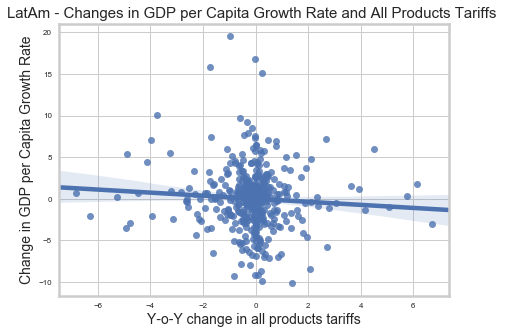

In [5]:
axap = sns.regplot(data =gdp_latam, x = "All Products_delta", y = "gdpdelta_2yr")
axap.set_title("LatAm - Changes in GDP per Capita Growth Rate and All Products Tariffs ", size = 15)
axap.set_xlabel("Y-o-Y change in all products tariffs", size = 14)
axap.set_ylabel('Change in GDP per Capita Growth Rate', size = 14)
axap.figure.savefig('latamgdp_allprod.png')

In [6]:
ols = smf.ols(formula = "GDP ~ AP", 
              data = gdp_latam.rename(columns = {"gdpdelta_2yr" : "GDP", 
                                          "All Products_delta"  : "AP"}))
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GDP   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.939
Date:                Fri, 01 Dec 2017   Prob (F-statistic):              0.165
Time:                        13:59:27   Log-Likelihood:                -1132.6
No. Observations:                 414   AIC:                             2269.
Df Residuals:                     412   BIC:                             2277.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0110      0.185      0.060      0.952      -0.353       0.375
AP            -0.1836      0.132     -1.393      0.165      -0.443       0.076
==============================================================================
Omnibus:                       71.988   Durbin-Watson:                   2.573
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              242.495
Skew:                           0.759   Prob(JB):                     2.20e-53
Kurtosis:                       6.429   Cond. No.                         1.43
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Applying the same approach to sub categories of tariff changes, we found very similar results.  Overall, there was a large clustering of observations where changes in both GDP growth rate and tariffs were static.  There were slightly negative relationships between changes in GDP growth rate and all tariff categories, except for raw materials.  

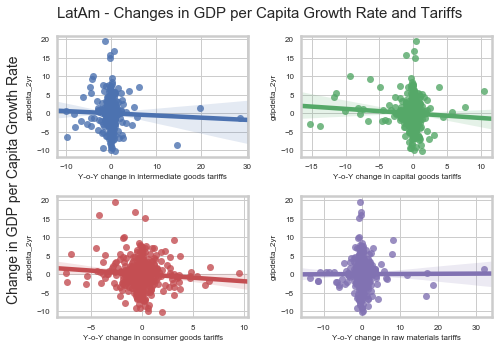

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=2)
economiclines(gdp_latam, "gdpdelta_2yr")
fig.text(0, 0.5, 'Change in GDP per Capita Growth Rate', va='center', rotation='vertical', size = 14)
fig.suptitle("LatAm - Changes in GDP per Capita Growth Rate and Tariffs", size = 15)
fig.subplots_adjust(top=0.9)
fig.savefig('latamgdp_byprod.png')


Indeed, our regression found that there is no significant relationship.  In fact, as a whole, the low r-squares implied that tariff changes had very little association with GDP growth rates.  

In [8]:
ols = smf.ols(formula = "GDP ~ KG + IG + CG + RM", 
              data = gdp_latam.rename(columns = {"gdpdelta_2yr" : "GDP", 
                                          "Capital goods_delta" : "KG",
                                          "Intermediate goods_delta" : "IG",
                                          "Consumer goods_delta" : "CG",
                                          "Raw materials_delta" : "RM"}))
model = ols.fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GDP   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.097
Date:                Fri, 01 Dec 2017   Prob (F-statistic):              0.358
Time:                        13:59:29   Log-Likelihood:                -1131.4
No. Observations:                 414   AIC:                             2273.
Df Residuals:                     409   BIC:                             2293.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0103      0.187     -0.055      0.956      -0.378       0.357
KG            -0.0752      0.105     -0.719      0.472      -0.281       0.130
IG            -0.0144      0.084     -0.171      0.864      -0.180       0.152
CG            -0.1809      0.115     -1.568      0.118      -0.408       0.046
RM             0.0397      0.062      0.637      0.524      -0.083       0.162
==============================================================================
Omnibus:                       68.425   Durbin-Watson:                   2.567
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              224.159
Skew:                           0.728   Prob(JB):                     2.11e-49
Kurtosis:                       6.298   Cond. No.                         3.29
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### G7 countries

Repeating the process for G7 countries, we found a similarly weak and negative relationship between tariffs and GDP growth.  

In [9]:
gdp_g7 = g7.drop(lforce_cols + unemp_cols + inflation_cols,  axis = 1)
gdp_g7 = gdp_g7.dropna()

gdp_g7['gdpdelta_2yr'] = gdp_g7['gdpdelta'].shift(-2)
gdp_g7['gdp%change_2yr'] = gdp_g7['gdp%change'].shift(-2)

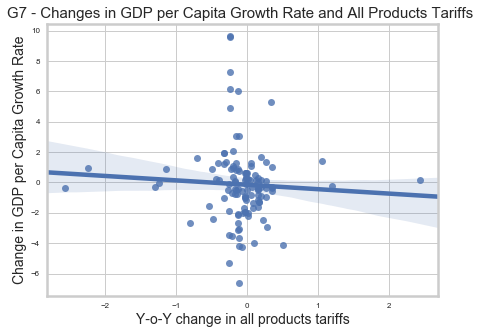

In [10]:
axap = sns.regplot(data =gdp_g7, x = "All Products_delta", y = "gdpdelta_2yr")
axap.set_title("G7 - Changes in GDP per Capita Growth Rate and All Products Tariffs ", size = 15)
axap.set_xlabel("Y-o-Y change in all products tariffs", size = 14)
axap.set_ylabel('Change in GDP per Capita Growth Rate', size = 14)
axap.figure.savefig('g7gdp_allprod.png')

In [11]:
ols = smf.ols(formula = "GDP ~ AP", 
              data = gdp_g7.rename(columns = {"gdpdelta_2yr" : "GDP", 
                                          "All Products_delta"  : "AP"}))
model = ols.fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GDP   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.4082
Date:                Fri, 01 Dec 2017   Prob (F-statistic):              0.524
Time:                        13:59:29   Log-Likelihood:                -273.75
No. Observations:                 118   AIC:                             551.5
Df Residuals:                     116   BIC:                             557.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1555      0.232     -0.671      0.504      -0.615       0.304
AP            -0.2904      0.454     -0.639      0.524      -1.191       0.610
==============================================================================
Omnibus:                       38.293   Durbin-Watson:                   2.545
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.664
Skew:                           1.202   Prob(JB):                     5.09e-23
Kurtosis:                       6.886   Cond. No.                         2.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

However, in the sub-categories, there were unexpected positive, albeit insignificant, relationships between intermediate and capital goods tariffs and GDP growth.  We also found a significant (at 10% level) relationship between consumer goods tariffs and GDP growth.  A possibile explanation for this phenomenon is that since imported goods were cheaper due to lower tariffs, consumers had more purchasing power for domestically produced goods or investments.  

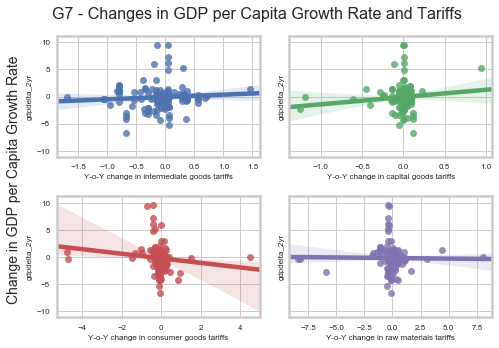

In [12]:

fig, axes = plt.subplots(nrows=2, ncols=2, sharey = True)
economiclines(gdp_g7, "gdpdelta_2yr")
fig.text(0, 0.5, 'Change in GDP per Capita Growth Rate', va='center', rotation='vertical', size = 14)
fig.suptitle("G7 - Changes in GDP per Capita Growth Rate and Tariffs ", size = 16)
fig.subplots_adjust(top=0.9)
fig.savefig('g7gdp_byprod.png')

In [13]:
ols = smf.ols(formula = "GDP ~ KG + IG + CG + RM", 
              data = gdp_g7.rename(columns = {"gdpdelta_2yr" : "GDP", 
                                          "Capital goods_delta" : "KG",
                                          "Intermediate goods_delta" : "IG",
                                          "Consumer goods_delta" : "CG",
                                          "Raw materials_delta" : "RM"}))
model = ols.fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GDP   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     1.580
Date:                Fri, 01 Dec 2017   Prob (F-statistic):              0.184
Time:                        13:59:31   Log-Likelihood:                -270.74
No. Observations:                 118   AIC:                             551.5
Df Residuals:                     113   BIC:                             565.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0961      0.234     -0.411      0.682      -0.559       0.367
KG             1.1949      1.137      1.051      0.295      -1.057       3.447
IG             0.6876      0.632      1.089      0.279      -0.564       1.939
CG            -0.7154      0.341     -2.098      0.038      -1.391      -0.040
RM             0.1101      0.175      0.631      0.530      -0.236       0.456
==============================================================================
Omnibus:                       36.346   Durbin-Watson:                   2.563
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.715
Skew:                           1.163   Prob(JB):                     1.21e-20
Kurtosis:                       6.639   Cond. No.                         8.74
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Bucketing rate changes


The effects of tariff changes may have been biased downwards, given the substantial clustering of observations around near-zero changes for both GDP growth and tariffs.  We extended the analysis to consider the effect of larger changes in tariffs and if they are related to more significant changes in growth rate.  

To do so, we categorized tariffs and growth rates into 3 buckets - increases, decreases and same.

### LatAm GDP per capita growth rates - buckets

In [14]:
cat_cols = ['All Products', 'Capital goods', 'Intermediate goods',
           'Consumer goods', 'Raw materials']

for col in cat_cols:
    gdp_latam[col+"_cat"] = ['increase' if x > 0.05 else 'same' if x>-0.05 else 'decrease' for x in gdp_latam[col+'_%change']]
    
gdp_latam["gdp_cat"] = ['increase' if x > 0.5 else 'same' if x >-0.5 else 'decrease' for x in gdp_latam['gdpdelta_2yr']]

Presenting the data in a bar chart, we can see that decreases in tariffs are associated with cases of increased growth rates and vice versa.  This inverse relationship also appears to be stronger for tariff decreases than increases.  

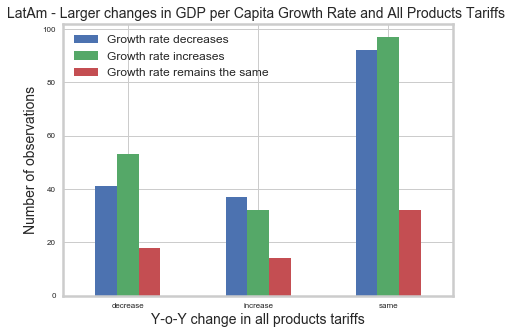

In [15]:
df0 = gdp_latam.groupby(["All Products_cat", "gdp_cat"]).size().unstack(fill_value = 0)
ax = df0.plot(kind = "bar", rot=0)
ax.legend(bbox_to_anchor=(1,1))
ax.set_ylabel("Number of observations", size = 14)
ax.set_xlabel("Y-o-Y change in all products tariffs", size = 14)

mylabels = ["Growth rate decreases", "Growth rate increases", "Growth rate remains the same"]
ax.legend(labels=mylabels, fontsize = 12)

ax.set_title("LatAm - Larger changes in GDP per Capita Growth Rate and All Products Tariffs ", size = 14)
ax.figure.savefig('latamgdp_bar.png')



Breaking down into sub-categories of tariffs, we observe very similar results, where decreases in tariffs are associated with more instances of improved gdp growth rates.  

In [16]:

mpl.rcParams['legend.fontsize'] = label_size

def economicbar(source, indicator):
    df1 = source.groupby(["Intermediate goods_cat", indicator]).size().unstack(fill_value = 0)
    df2 = source.groupby(["Capital goods_cat", indicator]).size().unstack(fill_value = 0)
    df3 = source.groupby(["Consumer goods_cat", indicator]).size().unstack(fill_value = 0)
    df4 = source.groupby(["Raw materials_cat", indicator]).size().unstack(fill_value = 0)

    axig2 = df1.plot(kind = "bar", rot=0, ax=axes[0,0], legend = False)
    axkg2 = df2.plot(kind = "bar", rot=0, ax=axes[0,1], legend = False)
    axcg2 = df3.plot(kind = "bar", rot=0, ax=axes[1,0], legend = False)
    axrm2 = df4.plot(kind = "bar", rot=0, ax=axes[1,1], legend = False)
    
    axig2.set_xlabel("Y-o-Y change in intermediate goods tariffs")
    axkg2.set_xlabel("Y-o-Y change in capital goods tariffs")
    axcg2.set_xlabel("Y-o-Y change in consumer goods tariffs")
    axrm2.set_xlabel("Y-o-Y change in raw materials tariffs")



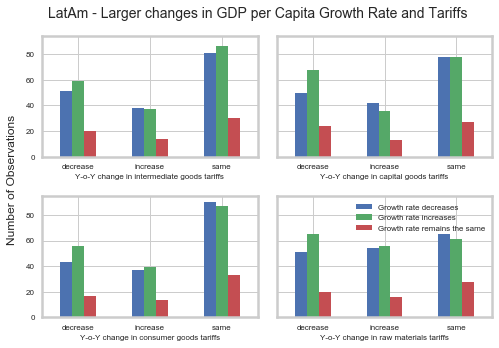

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharey = True)
economicbar(gdp_latam, "gdp_cat")
plt.legend(bbox_to_anchor=(1,1))
plt.legend(labels=mylabels)
plt.tight_layout()

fig.text(0, 0.5, 'Number of Observations', va='center', rotation='vertical', size = 12)
fig.suptitle("LatAm - Larger changes in GDP per Capita Growth Rate and Tariffs ", size = 14)
fig.subplots_adjust(top=0.9)

### G7 GDP per capita growth rates - buckets

In [18]:
cat_cols = ['All Products', 'Capital goods', 'Intermediate goods',
           'Consumer goods', 'Raw materials']

for col in cat_cols:
    gdp_g7[col+"_cat"] = ['increase' if x > 0.05 else 'same' if x>-0.05 else 'decrease' for x in gdp_g7[col+'_%change']]
    
gdp_g7["gdp_cat"] = ['increase' if x > 0.5 else 'same' if x >-0.5 else 'decrease' for x in gdp_g7['gdpdelta_2yr']]

In [19]:
df0 = gdp_g7.groupby(["All Products_cat", "gdp_cat"]).size().unstack(fill_value = 0)


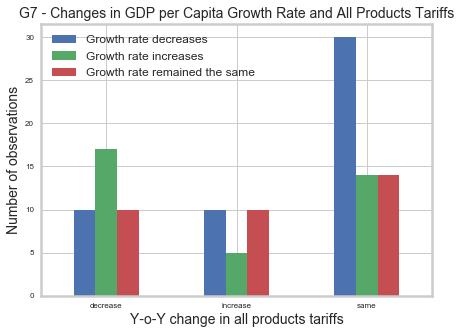

In [20]:
ax = df0.plot(kind = "bar", rot=0)
plt.legend(bbox_to_anchor=(1,1))

ax.set_ylabel("Number of observations", size = 14)
ax.set_xlabel("Y-o-Y change in all products tariffs", size = 14)

mylabels = ["Growth rate decreases", "Growth rate increases", "Growth rate remained the same"]
ax.legend(labels=mylabels, fontsize = 12)

ax.set_title("G7 - Changes in GDP per Capita Growth Rate and All Products Tariffs", size = 14)
ax.figure.savefig('g7gdp_bar.png')

From the graph above, we can see that the effects are consistent with those for LatAm countries, and possibly more pronounced.
An interesting observation: if tariffs were kept at relatively constant levels, the likelihood of slowing growth is higher for G7 countries vis-a-vis LatAm.  

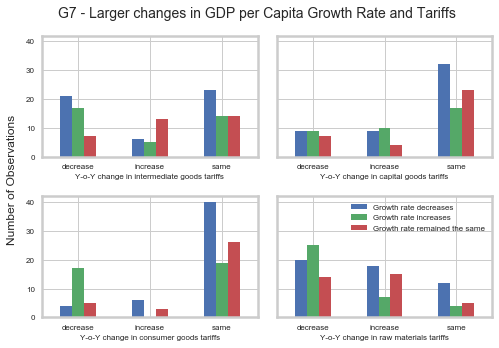

In [21]:
 
fig, axes = plt.subplots(nrows=2, ncols=2, sharey = True)
economicbar(gdp_g7, "gdp_cat")
plt.legend(bbox_to_anchor=(1,1))
plt.legend(labels=mylabels)
plt.tight_layout()
fig.text(0, 0.5, 'Number of Observations', va='center', rotation='vertical', size = 12)
fig.suptitle("G7 - Larger changes in GDP per Capita Growth Rate and Tariffs ", size = 14)
fig.subplots_adjust(top=0.9)

### Conclusion - GDP per Capita Growth Rate

Although we did not observe any significant relationship between tariff changes and GDP growth rates, there was a broad trend across both LatAm and G7 countries that reducing tariffs is more likely to improve GDP growth rates.  However, this exercise reminds us that GDP growth is driven by more factors than tariffs alone.  Policy makers seeking to improve a country's welfare would be wise to look beyond tariffs, and consider other factors such as productivity.  

#  Analysing effect of tariffs changes on inflation 

We expect that tariffs, particularly consumer goods tariffs, have a positive relationship with inflation rates.  This is relatively straightforward - as with all other taxes, import tarifs will increase prices and hence living costs.  

### LatAm Countries

Repeating the same steps for inflation rate, we did not find any relationship between tariff changes and inflation rates at the aggregated tariffs level.  

In [22]:
inflation_latam = latam.drop(unemp_cols + gdp_cols + lforce_cols,  axis = 1)
inflation_latam = inflation_latam.dropna()

inflation_latam['inflationdelta_2yr'] = inflation_latam['inflationdelta'].shift(-2)
inflation_latam['inflation%change_2yr'] = inflation_latam['inflation%change'].shift(-2)

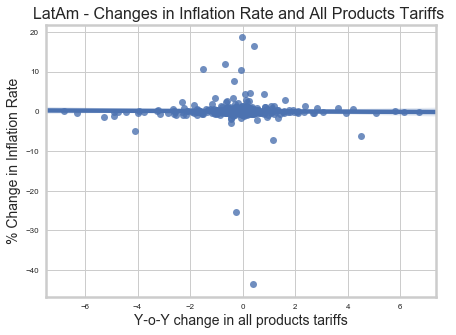

In [23]:
axap = sns.regplot(data =inflation_latam, x = "All Products_delta", y = "inflation%change_2yr")

axap.set_title("LatAm - Changes in Inflation Rate and All Products Tariffs ", size = 16)
axap.set_xlabel("Y-o-Y change in all products tariffs", size =14)
axap.set_ylabel('% Change in Inflation Rate', size =14)
axap.figure.savefig('lataminf_allproduc.png')

In [24]:
ols = smf.ols(formula = "INFLATION ~ AP", 
              data = inflation_latam.rename(columns = {"inflation%change_2yr" : "INFLATION", 
                                          "All Products_%change"  : "AP",}))
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              INFLATION   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1372
Date:                Fri, 01 Dec 2017   Prob (F-statistic):              0.711
Time:                        13:59:34   Log-Likelihood:                -1038.3
No. Observations:                 406   AIC:                             2081.
Df Residuals:                     404   BIC:                             2089.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0386      0.156      0.248      0.804      -0.267       0.344
AP            -0.3970      1.072     -0.370      0.711      -2.504       1.710
==============================================================================
Omnibus:                      575.585   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           200133.272
Skew:                          -6.816   Prob(JB):                         0.00
Kurtosis:                     110.911   Cond. No.                         6.90
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


Drilling into sub categories, we found that tariffs on raw materials had a strong positive relationship with inflation rates.  A potential reason for this could be that domestic production relies on imported raw materials, and high tariffs could adversely impact prices. 

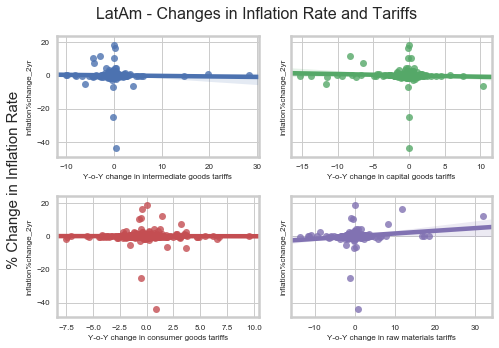

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharey = True)

economiclines(inflation_latam, 'inflation%change_2yr')

plt.tight_layout()

fig.text(0, 0.5, '% Change in Inflation Rate', va='center', rotation='vertical', size = 15)
fig.suptitle("LatAm - Changes in Inflation Rate and Tariffs ", size = 16)
fig.subplots_adjust(top=0.9)
fig.savefig('lataminf_byprod.png')

In [26]:
ols = smf.ols(formula = "INFLATION ~ KG + IG + CG + RM", 
              data = inflation_latam.rename(columns = {"inflation%change_2yr" : "INFLATION", 
                                          "Capital goods_delta" : "KG",
                                          "Intermediate goods_delta" : "IG",
                                          "Consumer goods_delta" : "CG",
                                          "Raw materials_delta" : "RM"}))
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              INFLATION   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     3.337
Date:                Fri, 01 Dec 2017   Prob (F-statistic):             0.0105
Time:                        13:59:36   Log-Likelihood:                -1031.7
No. Observations:                 406   AIC:                             2073.
Df Residuals:                     401   BIC:                             2094.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0124      0.156     -0.080      0.937      -0.319       0.294
KG            -0.0904      0.086     -1.048      0.295      -0.260       0.079
IG            -0.0143      0.070     -0.205      0.838      -0.151       0.123
CG            -0.0574      0.096     -0.598      0.550      -0.246       0.131
RM             0.1791      0.051      3.478      0.001       0.078       0.280
==============================================================================
Omnibus:                      600.701   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           223878.097
Skew:                          -7.405   Prob(JB):                         0.00
Kurtosis:                     117.083   Cond. No.                         3.31
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Bucketing rate changes
As we observed the same problem of clustered observations, we repeated the process of grouping them into three buckets.  This did not result in any observable trend, as it appeared that the number of country/years with decreasing inflation were spread across all three cases of tariff changes.  

In [27]:
cat_cols = ['All Products', 'Capital goods', 'Intermediate goods',
           'Consumer goods', 'Raw materials']

for col in cat_cols:
    inflation_latam[col+"_cat"] = ['increase' if x > 0.05 else 'same' if x>-0.05 else 'decrease' for x in inflation_latam[col+'_%change']]
    
inflation_latam["inflation_cat"] = ['increase' if x > 0.05 else 'same' if x >-0.05 else 'decrease' for x in inflation_latam['inflation%change_2yr']]

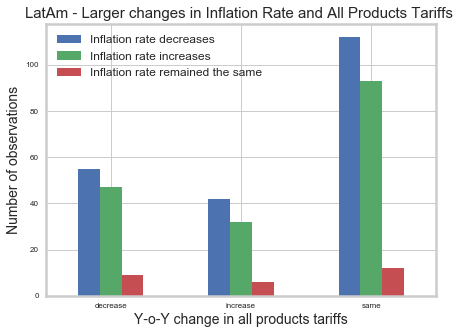

In [28]:
df0 = inflation_latam.groupby(["All Products_cat", "inflation_cat"]).size().unstack(fill_value = 0)
ax = df0.plot(kind = "bar", rot=0)
ax.legend(bbox_to_anchor=(1,1))
ax.set_ylabel("Number of observations", size = 14)
ax.set_xlabel("Y-o-Y change in all products tariffs", size = 14)

mylabels = ["Inflation rate decreases", "Inflation rate increases", "Inflation rate remained the same"]
ax.legend(labels=mylabels, fontsize = 12)

ax.set_title("LatAm - Larger changes in Inflation Rate and All Products Tariffs ", size = 15)
ax.figure.savefig('lataminf_bar.png')


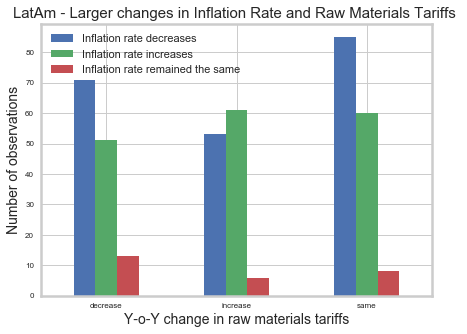

In [29]:
df0 = inflation_latam.groupby(["Raw materials_cat", "inflation_cat"]).size().unstack(fill_value = 0)
ax = df0.plot(kind = "bar", rot=0)
ax.legend(bbox_to_anchor=(1,1))
ax.set_ylabel("Number of observations", size = 14)
ax.set_xlabel("Y-o-Y change in raw materials tariffs", size = 14)

mylabels = ["Inflation rate decreases", "Inflation rate increases", "Inflation rate remained the same"]
ax.legend(labels=mylabels, fontsize = 11)

ax.set_title("LatAm - Larger changes in Inflation Rate and Raw Materials Tariffs ", size = 15)
ax.figure.savefig('lataminf_rmbar.png')


At the sub-category level, there continues to be no obvious relationships between tariff changes and inflations, save for raw materials. 

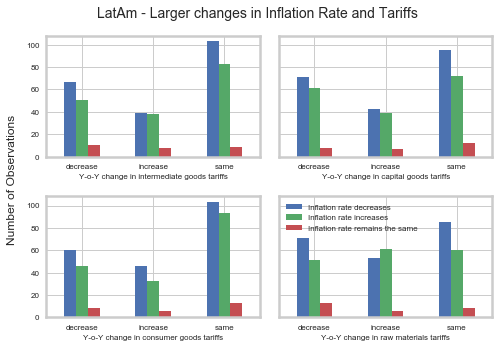

In [30]:
mylabels = ["Inflation rate decreases", "Inflation rate increases", "Inflation rate remains the same"]

fig, axes = plt.subplots(nrows=2, ncols=2, sharey = True)
economicbar(inflation_latam, "inflation_cat")

plt.legend(bbox_to_anchor=(1,1))
plt.legend(labels=mylabels)
plt.tight_layout()

fig.text(0, 0.5, 'Number of Observations', va='center', rotation='vertical', size = 12)
fig.suptitle("LatAm - Larger changes in Inflation Rate and Tariffs ", size = 14)
fig.subplots_adjust(top=0.9)

### G7 countries 

A linear look at the relationship between inflation rates and tariff changes appeared to show either zero or very slight negative relationships.  This is counter-intuitive, as one would expect prices to rise when import taxes increase. However, these relationships are insignificant, and may be tainted by the clustering of observations around zero. We will explore the relationship further by bucketing changes.  

In [31]:
inflation_g7 = g7.drop(unemp_cols + gdp_cols + lforce_cols,  axis = 1)
inflation_g7 = inflation_g7.dropna()

inflation_g7['inflationdelta_2yr'] = inflation_g7['inflationdelta'].shift(-2)
inflation_g7['inflation%change_2yr'] = inflation_g7['inflation%change'].shift(-2)

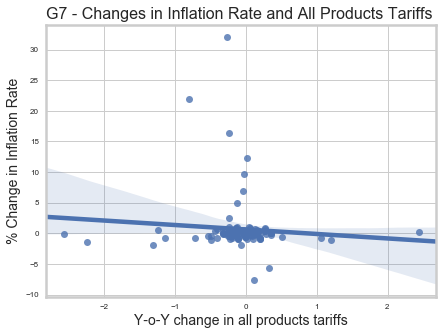

In [32]:
axap = sns.regplot(data =inflation_g7, x = "All Products_delta", y = "inflation%change_2yr")

axap.set_title("G7 - Changes in Inflation Rate and All Products Tariffs ", size = 16)
axap.set_xlabel("Y-o-Y change in all products tariffs", size = 14)
axap.set_ylabel('% Change in Inflation Rate', size = 14)
axap.figure.savefig('g7inf_allprod.png')

In [33]:
ols = smf.ols(formula = "INFLATION ~ AP", 
              data = inflation_g7.rename(columns = {"inflation%change_2yr" : "INFLATION", 
                                          "All Products_%change"  : "AP",}))
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              INFLATION   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.315
Date:                Fri, 01 Dec 2017   Prob (F-statistic):              0.254
Time:                        13:59:38   Log-Likelihood:                -338.68
No. Observations:                 118   AIC:                             681.4
Df Residuals:                     116   BIC:                             686.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6438      0.398      1.618      0.108      -0.144       1.432
AP            -3.3134      2.889     -1.147      0.254      -9.036       2.409
==============================================================================
Omnibus:                      153.892   Durbin-Watson:                   2.181
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4368.403
Skew:                           4.860   Prob(JB):                         0.00
Kurtosis:                      31.178   Cond. No.                         7.29
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

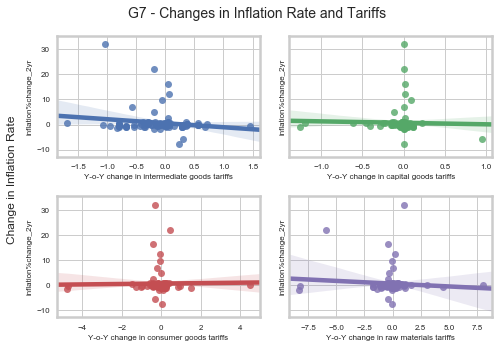

In [34]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharey = True)

economiclines(inflation_g7, 'inflation%change_2yr')

plt.tight_layout()
fig.text(0, 0.5, 'Change in Inflation Rate', va='center', rotation='vertical', size = 12)
fig.suptitle("G7 - Changes in Inflation Rate and Tariffs ", size = 14)
fig.subplots_adjust(top=0.9)

In [35]:
ols = smf.ols(formula = "INFLATION ~ KG + IG + CG + RM", 
              data = inflation_g7.rename(columns = {"inflation%change_2yr" : "INFLATION", 
                                          "Capital goods_delta" : "KG",
                                          "Intermediate goods_delta" : "IG",
                                          "Consumer goods_delta" : "CG",
                                          "Raw materials_delta" : "RM"}))
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              INFLATION   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.146
Date:                Fri, 01 Dec 2017   Prob (F-statistic):              0.338
Time:                        13:59:40   Log-Likelihood:                -336.99
No. Observations:                 118   AIC:                             684.0
Df Residuals:                     113   BIC:                             697.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5442      0.410      1.328      0.187      -0.268       1.356
KG             0.2488      1.993      0.125      0.901      -3.700       4.198
IG            -1.9089      1.107     -1.724      0.087      -4.103       0.285
CG             0.7445      0.598      1.245      0.216      -0.440       1.929
RM            -0.2288      0.306     -0.747      0.456      -0.835       0.378
==============================================================================
Omnibus:                      146.595   Durbin-Watson:                   2.275
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3576.252
Skew:                           4.556   Prob(JB):                         0.00
Kurtosis:                      28.384   Cond. No.                         8.74
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Bucketing rate changes
Bucketing of inflation and tariff rate changes provided an interesting insight - a decreasing tariffs appear more strongly associated with lowering rates of inflation than constant or increasing tariffs.  While our hypothesis of a positive relationship remains unproven, this result is indicative that lower tariffs could help to lower inflation rates.  

In [36]:
cat_cols = ['All Products', 'Capital goods', 'Intermediate goods',
           'Consumer goods', 'Raw materials']

for col in cat_cols:
    inflation_g7[col+"_cat"] = ['increase' if x > 0.05 else 'same' if x>-0.05 else 'decrease' for x in inflation_g7[col+'_%change']]
    
inflation_g7["inflation_cat"] = ['increase' if x > 0.05 else 'same' if x >-0.05 else 'decrease' for x in inflation_g7['inflation%change_2yr']]

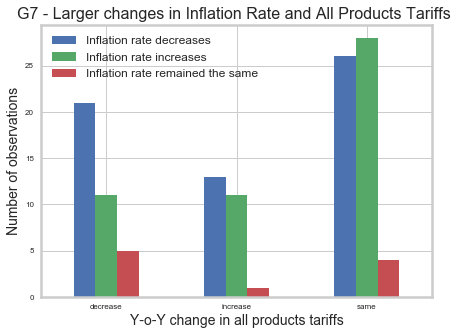

In [37]:
df0 = inflation_g7.groupby(["All Products_cat", "inflation_cat"]).size().unstack(fill_value = 0)
ax = df0.plot(kind = "bar", rot=0)
ax.legend(bbox_to_anchor=(1,1))
ax.set_ylabel("Number of observations", size = 14)
ax.set_xlabel("Y-o-Y change in all products tariffs", size = 14)

mylabels = ["Inflation rate decreases", "Inflation rate increases", "Inflation rate remained the same"]
ax.legend(labels=mylabels, fontsize = 12)

ax.set_title("G7 - Larger changes in Inflation Rate and All Products Tariffs ", size = 16)
ax.figure.savefig('g7inf_bar.png')

Observations based on sub-categories of tariff changes appear to support findings at the broader level.  Even though tariffs on capital goods continue to exhibit a negative relationship with inflation rates, this effect may be driven more by falling inflation rates due to other economic reasons, as opposed to tariffs themselves.  This is evident in falling inflation rates despite relatively constant tariffs (large number of observations in the 'same' bucket).  



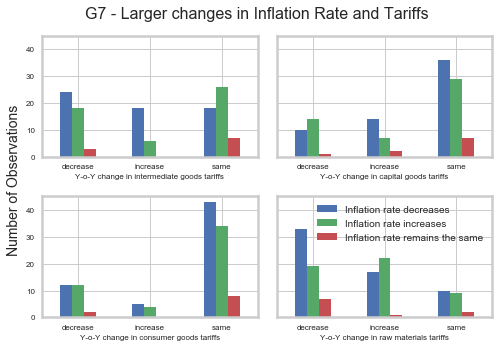

In [38]:
mylabels = ["Inflation rate decreases", "Inflation rate increases", "Inflation rate remains the same"]

fig, axes = plt.subplots(nrows=2, ncols=2, sharey = True)
economicbar(inflation_g7, "inflation_cat")

plt.legend(bbox_to_anchor=(1,1))
plt.legend(labels=mylabels, fontsize = 10)
plt.tight_layout()

fig.text(0, 0.5, 'Number of Observations', va='center', rotation='vertical', size = 14)
fig.suptitle("G7 - Larger changes in Inflation Rate and Tariffs ", size = 16)
fig.subplots_adjust(top=0.9)
fig.savefig('g7inf_4bar.png')

### Conclusion - Inflation
We see that both LatAm and G7 countries may have positive relationships between tariffs on raw materials and inflations.  
Again, this is likely to be because raw material prices influence prices of domestically produced goods, thus driving inflation.  There is no concrete evidence that one group experiences it more strongly than the other. 

Nonetheless, this adds strength to the story that tariffs should not be the weapon of choice to improve economic welfare.  

#  Analysing effect of tariffs changes on unemployment

As highlighted before, freer trade theorectically increases a country's income.  However, this does not necessarily imply a Pareto improvement, as some jobs may be lost to other countries, and workers are unable to move into other sectors.  

Being UChicago students, we hope to see positive relationship, where lower tariffs help to create jobs. However, we acknowledge that imports could cause sectoral changes that take time to repair (e.g. retraining workers for another sector).  In this, there is a possibility of an inverse relationship, where reducing tariffs could result in loss of jobs and higher unemployment. 


### LatAm Countries

At the high level, we found an almost marginally significant negative relationship between tariff changes and unemployment rates.  The negative relationship is echoed in the subcategories (except for raw materials), implying that pockets of the workforce could be hurt as LatAm countries liberalize.  

The positive relationship between tariffs on raw materials and unemployment rates echo our findings findings from inflation, where LatAm countries are hurt by increasing tariffs.  

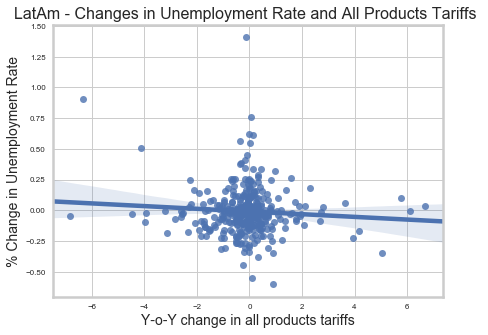

In [39]:

unemp_latam = latam.drop(lforce_cols + gdp_cols + inflation_cols,  axis = 1)
unemp_latam = unemp_latam.dropna()

unemp_latam['unempdelta_2yr'] = unemp_latam['unempdelta'].shift(-2)
unemp_latam['unemp%change_2yr'] = unemp_latam['unemp%change'].shift(-2)

axap = sns.regplot(data =unemp_latam, x = "All Products_delta", y = "unemp%change_2yr")
axap.set_title("LatAm - Changes in Unemployment Rate and All Products Tariffs ", size = 16)
axap.set_xlabel("Y-o-Y change in all products tariffs", size = 14)
axap.set_ylabel('% Change in Unemployment Rate', size = 14)
axap.figure.savefig("latamunemp_allprod.png")

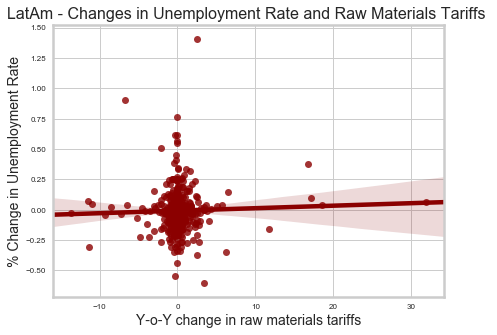

In [40]:

unemp_latam = latam.drop(lforce_cols + gdp_cols + inflation_cols,  axis = 1)
unemp_latam = unemp_latam.dropna()

unemp_latam['unempdelta_2yr'] = unemp_latam['unempdelta'].shift(-2)
unemp_latam['unemp%change_2yr'] = unemp_latam['unemp%change'].shift(-2)

axap = sns.regplot(data =unemp_latam, x = "Raw materials_delta", y = "unemp%change_2yr", color= 'darkred')
axap.set_title("LatAm - Changes in Unemployment Rate and Raw Materials Tariffs ", size = 16)
axap.set_xlabel("Y-o-Y change in raw materials tariffs", size = 14)
axap.set_ylabel('% Change in Unemployment Rate', size = 14)
axap.figure.savefig("latamunemp_raw.png")

In [41]:
ols = smf.ols(formula = "UNEMP ~ AP", 
              data = unemp_latam.rename(columns = {"unemp%change_2yr" : "UNEMP", 
                                          "All Products_%change"  : "AP",}))
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  UNEMP   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     2.426
Date:                Fri, 01 Dec 2017   Prob (F-statistic):              0.120
Time:                        13:59:43   Log-Likelihood:                 105.19
No. Observations:                 383   AIC:                            -206.4
Df Residuals:                     381   BIC:                            -198.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0080      0.009     -0.850      0.396      -0.027       0.011
AP            -0.1028      0.066     -1.558      0.120      -0.233       0.027
==============================================================================
Omnibus:                      197.810   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2191.911
Skew:                           1.913   Prob(JB):                         0.00
Kurtosis:                      14.078   Cond. No.                         7.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

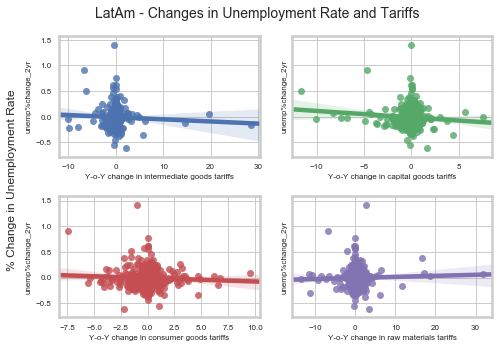

In [42]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharey = True)

economiclines(unemp_latam, 'unemp%change_2yr')

plt.tight_layout()

fig.text(0, 0.5, '% Change in Unemployment Rate', va='center', rotation='vertical', size = 12)
fig.suptitle("LatAm - Changes in Unemployment Rate and Tariffs ", size = 14)
fig.subplots_adjust(top=0.9)

In [43]:
ols = smf.ols(formula = "UNEMP ~ KG + IG + CG + RM", 
              data = unemp_latam.rename(columns = {"unemp%change_2yr" : "UNEMP", 
                                          "Capital goods_delta" : "KG",
                                          "Intermediate goods_delta" : "IG",
                                          "Consumer goods_delta" : "CG",
                                          "Raw materials_delta" : "RM"}))
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  UNEMP   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.312
Date:                Fri, 01 Dec 2017   Prob (F-statistic):              0.265
Time:                        13:59:44   Log-Likelihood:                 106.61
No. Observations:                 383   AIC:                            -203.2
Df Residuals:                     378   BIC:                            -183.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0107      0.010     -1.114      0.266      -0.029       0.008
KG            -0.0101      0.007     -1.386      0.167      -0.024       0.004
IG            -0.0016      0.004     -0.373      0.710      -0.010       0.007
CG            -0.0046      0.007     -0.690      0.490      -0.018       0.008
RM             0.0033      0.003      1.043      0.298      -0.003       0.010
==============================================================================
Omnibus:                      195.157   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2134.856
Skew:                           1.883   Prob(JB):                         0.00
Kurtosis:                      13.936   Cond. No.                         3.29
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Bucketing rate changes
After sieving out the near-zero observations, we found that there are generally more instances of decreases in unemployment rate than increases.  There may be a case to be made that unmployment rate decreases are more closely associated with tariff reductions than increases, particularly for intermediate goods, but this case is weak, at best.  

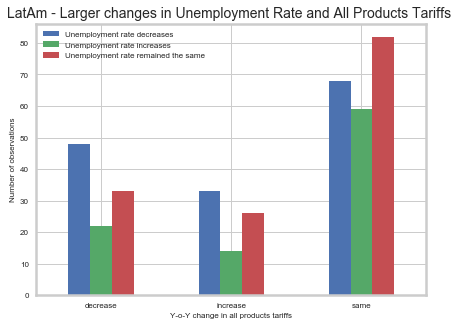

In [44]:
cat_cols = ['All Products', 'Capital goods', 'Intermediate goods',
           'Consumer goods', 'Raw materials']

for col in cat_cols:
    unemp_latam[col+"_cat"] = ['increase' if x > 0.05 else 'same' if x>-0.05 else 'decrease' for x in unemp_latam[col+'_%change']]
    
unemp_latam["unemp_cat"] = ['increase' if x > 0.05 else 'same' if x >-0.05 else 'decrease' for x in unemp_latam['unemp%change_2yr']]

df0 = unemp_latam.groupby(["All Products_cat", "unemp_cat"]).size().unstack(fill_value = 0)
ax = df0.plot(kind = "bar", rot=0)
ax.legend(bbox_to_anchor=(1,1))
ax.set_ylabel("Number of observations")
ax.set_xlabel("Y-o-Y change in all products tariffs")

mylabels = ["Unemployment rate decreases", "Unemployment rate increases", "Unemployment rate remained the same"]
ax.legend(labels=mylabels)

ax.set_title("LatAm - Larger changes in Unemployment Rate and All Products Tariffs ", size = 14)


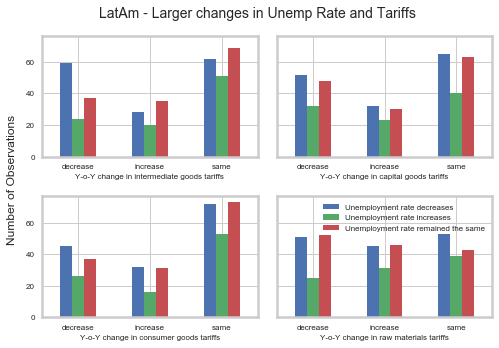

In [45]:
mylabels = ["Unemployment rate decreases", "Unemployment rate increases", "Unemployment rate remained the same"]
fig, axes = plt.subplots(nrows=2, ncols=2, sharey = True)
economicbar(unemp_latam, "unemp_cat")

plt.legend(bbox_to_anchor=(1,1))
plt.legend(labels=mylabels)
plt.tight_layout()

fig.text(0, 0.5, 'Number of Observations', va='center', rotation='vertical', size = 12)
fig.suptitle("LatAm - Larger changes in Unemp Rate and Tariffs ", size = 14)
fig.subplots_adjust(top=0.9)

### G7 countries

Similar to LatAm countries, we observed negative relationships between unemployment rates and tariff changes.  This is seen most strongly in tariffs for capital goods.

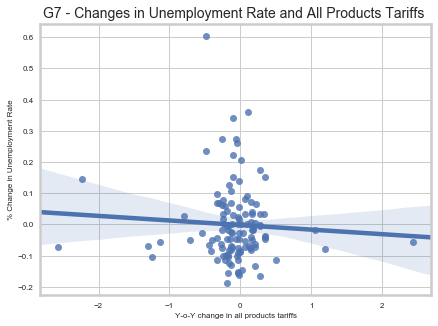

In [46]:
unemp_g7 = g7.drop(lforce_cols + gdp_cols + inflation_cols,  axis = 1)
unemp_g7 = unemp_g7.dropna()

unemp_g7['unempdelta_2yr'] = unemp_g7['unempdelta'].shift(-2)
unemp_g7['unemp%change_2yr'] = unemp_g7['unemp%change'].shift(-2)

axap = sns.regplot(data =unemp_g7, x = "All Products_delta", y = "unemp%change_2yr")
axap.set_title("G7 - Changes in Unemployment Rate and All Products Tariffs ", size = 14)
axap.set_xlabel("Y-o-Y change in all products tariffs")
axap.set_ylabel('% Change in Unemployment Rate')

In [47]:
ols = smf.ols(formula = "UNEMP ~ AP", 
              data = unemp_g7.rename(columns = {"unemp%change_2yr" : "UNEMP", 
                                          "All Products_%change"  : "AP",}))
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  UNEMP   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.058
Date:                Fri, 01 Dec 2017   Prob (F-statistic):              0.306
Time:                        13:59:46   Log-Likelihood:                 83.124
No. Observations:                 118   AIC:                            -162.2
Df Residuals:                     116   BIC:                            -156.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0019      0.011     -0.168      0.867      -0.024       0.020
AP            -0.0833      0.081     -1.029      0.306      -0.244       0.077
==============================================================================
Omnibus:                       55.335   Durbin-Watson:                   1.230
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.624
Skew:                           1.742   Prob(JB):                     5.40e-38
Kurtosis:                       7.771   Cond. No.                         7.29
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

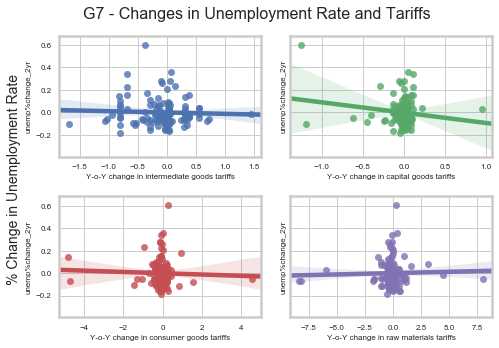

In [48]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharey = True)

economiclines(unemp_g7, 'unemp%change_2yr')

plt.tight_layout()

fig.text(0, 0.5, '% Change in Unemployment Rate', va='center', rotation='vertical', size = 14)
fig.suptitle("G7 - Changes in Unemployment Rate and Tariffs ", size = 16)
fig.subplots_adjust(top=0.9)
fig.savefig('g7unemp_byprod.png')

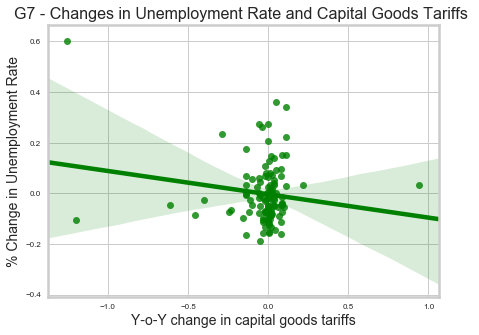

In [49]:
unemp_g7 = g7.drop(lforce_cols + gdp_cols + inflation_cols,  axis = 1)
unemp_g7 = unemp_g7.dropna()

unemp_g7['unempdelta_2yr'] = unemp_g7['unempdelta'].shift(-2)
unemp_g7['unemp%change_2yr'] = unemp_g7['unemp%change'].shift(-2)

axap = sns.regplot(data =unemp_g7, x = "Capital goods_delta", y = "unemp%change_2yr", color = "green")
axap.set_title("G7 - Changes in Unemployment Rate and Capital Goods Tariffs ", size = 16)
axap.set_xlabel("Y-o-Y change in capital goods tariffs", size = 14)
axap.set_ylabel('% Change in Unemployment Rate', size = 14)
axap.figure.savefig("g7unemp_cg.png")

In [50]:
ols = smf.ols(formula = "UNEMP ~ KG + IG + CG + RM", 
              data = unemp_g7.rename(columns = {"unemp%change_2yr" : "UNEMP", 
                                          "Capital goods_delta" : "KG",
                                          "Intermediate goods_delta" : "IG",
                                          "Consumer goods_delta" : "CG",
                                          "Raw materials_delta" : "RM"}))
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  UNEMP   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.8495
Date:                Fri, 01 Dec 2017   Prob (F-statistic):              0.497
Time:                        13:59:48   Log-Likelihood:                 84.336
No. Observations:                 118   AIC:                            -158.7
Df Residuals:                     113   BIC:                            -144.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0037      0.012     -0.317      0.752      -0.026       0.019
KG            -0.0895      0.056     -1.595      0.114      -0.201       0.022
IG             0.0014      0.031      0.046      0.964      -0.060       0.063
CG            -0.0090      0.017     -0.536      0.593      -0.042       0.024
RM             0.0046      0.009      0.529      0.598      -0.013       0.022
==============================================================================
Omnibus:                       38.287   Durbin-Watson:                   1.197
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.759
Skew:                           1.386   Prob(JB):                     9.63e-17
Kurtosis:                       5.705   Cond. No.                         8.74
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Bucketing rate changes
For G7 countries, bucketing did not produce any discernible trends.  

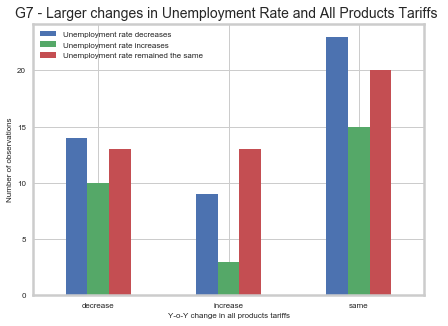

In [51]:
cat_cols = ['All Products', 'Capital goods', 'Intermediate goods',
           'Consumer goods', 'Raw materials']

for col in cat_cols:
    unemp_g7[col+"_cat"] = ['increase' if x > 0.05 else 'same' if x>-0.05 else 'decrease' for x in unemp_g7[col+'_%change']]
    
unemp_g7["unemp_cat"] = ['increase' if x > 0.05 else 'same' if x >-0.05 else 'decrease' for x in unemp_g7['unemp%change_2yr']]

df0 = unemp_g7.groupby(["All Products_cat", "unemp_cat"]).size().unstack(fill_value = 0)
ax = df0.plot(kind = "bar", rot=0)
ax.legend(bbox_to_anchor=(1,1))
ax.set_ylabel("Number of observations")
ax.set_xlabel("Y-o-Y change in all products tariffs")

mylabels = ["Unemployment rate decreases", "Unemployment rate increases", "Unemployment rate remained the same"]
ax.legend(labels=mylabels)

ax.set_title("G7 - Larger changes in Unemployment Rate and All Products Tariffs ", size = 14)


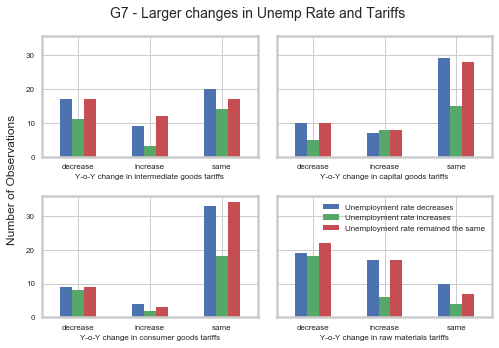

In [52]:
mylabels = ["Unemployment rate decreases", "Unemployment rate increases", "Unemployment rate remained the same"]
fig, axes = plt.subplots(nrows=2, ncols=2, sharey = True)
economicbar(unemp_g7, "unemp_cat")

plt.legend(bbox_to_anchor=(1,1))
plt.legend(labels=mylabels)
plt.tight_layout()

fig.text(0, 0.5, 'Number of Observations', va='center', rotation='vertical', size = 12)
fig.suptitle("G7 - Larger changes in Unemp Rate and Tariffs ", size = 14)
fig.subplots_adjust(top=0.9)

### Conclusion - Unemployment rates

As before, LatAm countries' economies seemed to be tied more closely with tariffs on raw materials than any other tariffs, and this impact appears to be stronger for LatAm than for G7. We did not observe other relationships that distinguishes sharply LatAm from G7 countires where tariffs and unemployment rates are concerned.  


## Overall conclusion
Although we could not find evidence that tariffs (and in turn, freer trade) had an effect on economic welfare in LatAm or G7 countries, there remains an important message - Imposing tariffs do not improve welfare either.  Politicians campaign on increased tariffs to protect jobs, a soothing message to their constituents.  However, whilst tariffs may improve the lives of that small group whose jobs are protected, the larger population may not benefit as a result.  Voters should be skeptical about pushes to increase tariffs, and instead ask, what can be done to ensure that people adversely affected by trade openness are compensated in one way or another. 

## Analysis with labor force

### LatAm countries

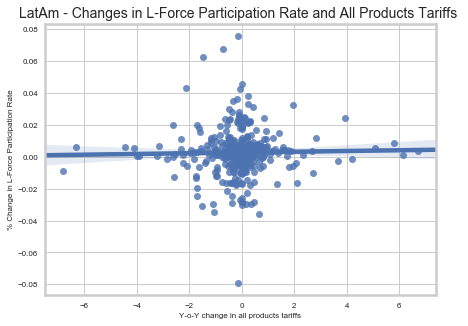

In [53]:

lforce_latam = latam.drop(unemp_cols + gdp_cols + inflation_cols,  axis = 1)
lforce_latam = lforce_latam.dropna()

lforce_latam['lforcedelta_2yr'] = lforce_latam['lforcedelta'].shift(-2)
lforce_latam['lforce%change_2yr'] = lforce_latam['lforce%change'].shift(-2)
axap = sns.regplot(data =lforce_latam, x = "All Products_delta", y = "lforce%change_2yr")

axap.set_title("LatAm - Changes in L-Force Participation Rate and All Products Tariffs ", size = 14)
axap.set_xlabel("Y-o-Y change in all products tariffs")
axap.set_ylabel('% Change in L-Force Participation Rate')

In [54]:
ols = smf.ols(formula = "LFORCE ~ AP", 
              data = lforce_latam.rename(columns = {"lforce%change_2yr" : "LFORCE", 
                                          "All Products_%change"  : "AP",}))
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 LFORCE   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.2126
Date:                Fri, 01 Dec 2017   Prob (F-statistic):              0.645
Time:                        13:59:50   Log-Likelihood:                 1086.9
No. Observations:                 383   AIC:                            -2170.
Df Residuals:                     381   BIC:                            -2162.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0026      0.001      3.572      0.000       0.001       0.004
AP             0.0023      0.005      0.461      0.645      -0.008       0.012
==============================================================================
Omnibus:                       64.770   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              647.835
Skew:                           0.289   Prob(JB):                    2.11e-141
Kurtosis:                       9.345   Cond. No.                         7.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

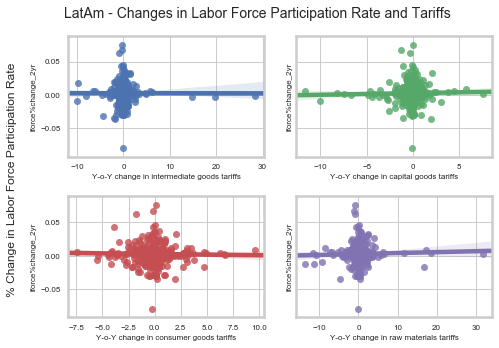

In [55]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharey = True)

economiclines(lforce_latam, 'lforce%change_2yr')

plt.tight_layout()

fig.text(0, 0.5, '% Change in Labor Force Participation Rate', va='center', rotation='vertical', size = 12)
fig.suptitle("LatAm - Changes in Labor Force Participation Rate and Tariffs ", size = 14)
fig.subplots_adjust(top=0.9)

In [56]:
ols = smf.ols(formula = "LFORCE ~ KG + IG + CG + RM", 
              data = lforce_latam.rename(columns = {"lforce%change_2yr" : "LFORCE", 
                                          "Capital goods_delta" : "KG",
                                          "Intermediate goods_delta" : "IG",
                                          "Consumer goods_delta" : "CG",
                                          "Raw materials_delta" : "RM"}))
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 LFORCE   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.3507
Date:                Fri, 01 Dec 2017   Prob (F-statistic):              0.843
Time:                        13:59:52   Log-Likelihood:                 1087.5
No. Observations:                 383   AIC:                            -2165.
Df Residuals:                     378   BIC:                            -2145.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0026      0.001      3.525      0.000       0.001       0.004
KG             0.0004      0.001      0.791      0.430      -0.001       0.002
IG         -6.226e-05      0.000     -0.191      0.849      -0.001       0.001
CG            -0.0005      0.001     -0.884      0.377      -0.001       0.001
RM             0.0002      0.000      0.813      0.417      -0.000       0.001
==============================================================================
Omnibus:                       64.385   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              656.167
Skew:                           0.270   Prob(JB):                    3.27e-143
Kurtosis:                       9.390   Cond. No.                         3.29
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

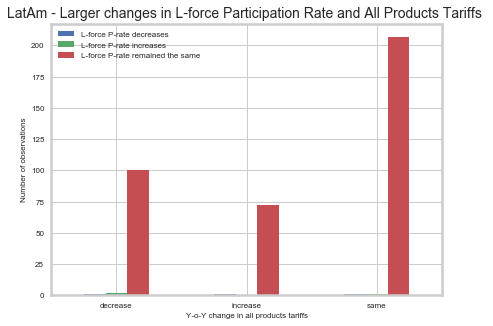

In [57]:
cat_cols = ['All Products', 'Capital goods', 'Intermediate goods',
           'Consumer goods', 'Raw materials']

for col in cat_cols:
    lforce_latam[col+"_cat"] = ['increase' if x > 0.05 else 'same' if x>-0.05 else 'decrease' for x in lforce_latam[col+'_%change']]
    
lforce_latam["lforce_cat"] = ['increase' if x > 0.05 else 'same' if x >-0.05 else 'decrease' for x in lforce_latam['lforce%change_2yr']]

df0 = lforce_latam.groupby(["All Products_cat", "lforce_cat"]).size().unstack(fill_value = 0)
ax = df0.plot(kind = "bar", rot=0)
ax.legend(bbox_to_anchor=(1,1))
ax.set_ylabel("Number of observations")
ax.set_xlabel("Y-o-Y change in all products tariffs")

mylabels = ["L-force P-rate decreases", "L-force P-rate increases", "L-force P-rate remained the same"]
ax.legend(labels=mylabels)

ax.set_title("LatAm - Larger changes in L-force Participation Rate and All Products Tariffs ", size = 14)


As the changes in lforce participation rate are too small, we made it into binary increases/decreases:

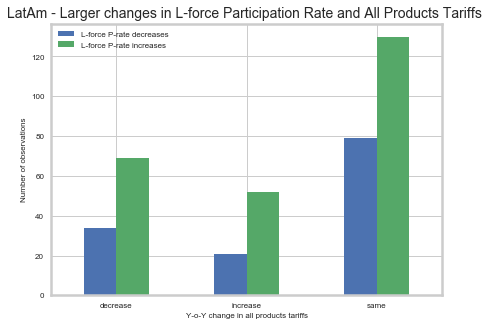

In [58]:
lforce_latam["lforce2_cat"] = ['increase' if x > 0 else 'decrease' for x in lforce_latam['lforce%change_2yr']]

df0 = lforce_latam.groupby(["All Products_cat", "lforce2_cat"]).size().unstack(fill_value = 0)
ax = df0.plot(kind = "bar", rot=0)
ax.legend(bbox_to_anchor=(1,1))
ax.set_ylabel("Number of observations")
ax.set_xlabel("Y-o-Y change in all products tariffs")

mylabels = ["L-force P-rate decreases", "L-force P-rate increases", ]
ax.legend(labels=mylabels)

ax.set_title("LatAm - Larger changes in L-force Participation Rate and All Products Tariffs ", size = 14)


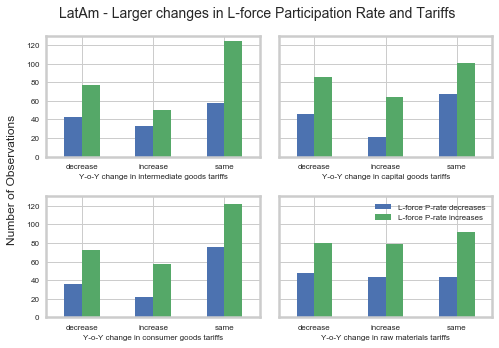

In [59]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharey = True)
economicbar(lforce_latam, "lforce2_cat")

plt.legend(bbox_to_anchor=(1,1))
plt.legend(labels=mylabels)
plt.tight_layout()

fig.text(0, 0.5, 'Number of Observations', va='center', rotation='vertical', size = 12)
fig.suptitle("LatAm - Larger changes in L-force Participation Rate and Tariffs ", size = 14)
fig.subplots_adjust(top=0.9)

### G7 countries

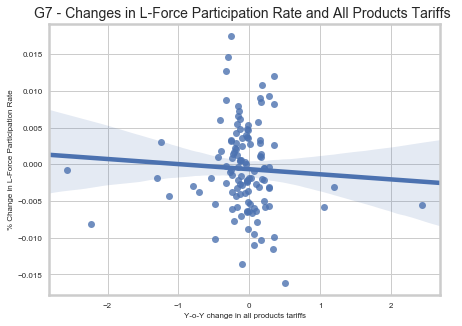

In [60]:
lforce_g7 = g7.drop(unemp_cols + gdp_cols + inflation_cols,  axis = 1)
lforce_g7 = lforce_g7.dropna()

lforce_g7['lforcedelta_2yr'] = lforce_g7['lforcedelta'].shift(-2)
lforce_g7['lforce%change_2yr'] = lforce_g7['lforce%change'].shift(-2)
axap = sns.regplot(data =lforce_g7, x = "All Products_delta", y = "lforce%change_2yr")

axap.set_title("G7 - Changes in L-Force Participation Rate and All Products Tariffs ", size = 14)
axap.set_xlabel("Y-o-Y change in all products tariffs")
axap.set_ylabel('% Change in L-Force Participation Rate')

In [61]:
ols = smf.ols(formula = "LFORCE ~ AP", 
              data = lforce_g7.rename(columns = {"lforce%change_2yr" : "LFORCE", 
                                          "All Products_%change"  : "AP",}))
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 LFORCE   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9788
Date:                Fri, 01 Dec 2017   Prob (F-statistic):              0.325
Time:                        13:59:55   Log-Likelihood:                 439.26
No. Observations:                 118   AIC:                            -874.5
Df Residuals:                     116   BIC:                            -869.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0007      0.001     -1.212      0.228      -0.002       0.000
AP            -0.0039      0.004     -0.989      0.325      -0.012       0.004
==============================================================================
Omnibus:                        3.090   Durbin-Watson:                   1.548
Prob(Omnibus):                  0.213   Jarque-Bera (JB):                2.515
Skew:                           0.323   Prob(JB):                        0.284
Kurtosis:                       3.306   Cond. No.                         7.29
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

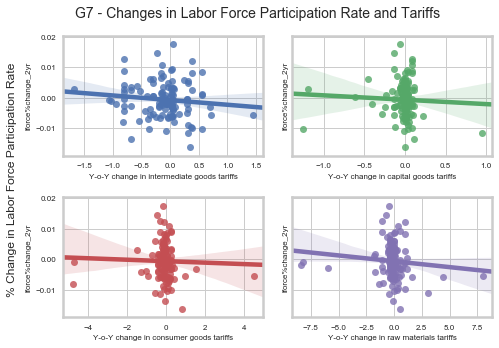

In [62]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharey = True)

economiclines(lforce_g7, 'lforce%change_2yr')

plt.tight_layout()

fig.text(0, 0.5, '% Change in Labor Force Participation Rate', va='center', rotation='vertical', size = 12)
fig.suptitle("G7 - Changes in Labor Force Participation Rate and Tariffs ", size = 14)
fig.subplots_adjust(top=0.9)

In [63]:
ols = smf.ols(formula = "LFORCE ~ KG + IG + CG + RM", 
              data = lforce_g7.rename(columns = {"lforce%change_2yr" : "LFORCE", 
                                          "Capital goods_delta" : "KG",
                                          "Intermediate goods_delta" : "IG",
                                          "Consumer goods_delta" : "CG",
                                          "Raw materials_delta" : "RM"}))
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 LFORCE   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                 -0.015
Method:                 Least Squares   F-statistic:                    0.5781
Date:                Fri, 01 Dec 2017   Prob (F-statistic):              0.679
Time:                        13:59:56   Log-Likelihood:                 439.96
No. Observations:                 118   AIC:                            -869.9
Df Residuals:                     113   BIC:                            -856.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0008      0.001     -1.361      0.176      -0.002       0.000
KG            -0.0009      0.003     -0.343      0.732      -0.006       0.005
IG            -0.0012      0.002     -0.773      0.441      -0.004       0.002
CG             0.0005      0.001      0.551      0.582      -0.001       0.002
RM            -0.0004      0.000     -0.917      0.361      -0.001       0.000
==============================================================================
Omnibus:                        4.200   Durbin-Watson:                   1.574
Prob(Omnibus):                  0.122   Jarque-Bera (JB):                3.594
Skew:                           0.370   Prob(JB):                        0.166
Kurtosis:                       3.429   Cond. No.                         8.74
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

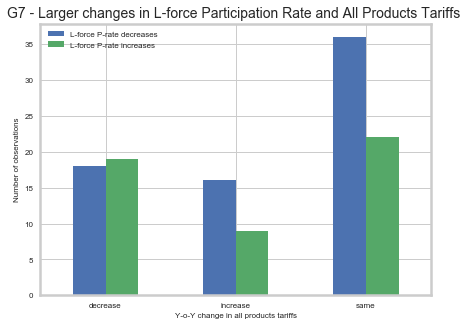

In [64]:
cat_cols = ['All Products', 'Capital goods', 'Intermediate goods',
           'Consumer goods', 'Raw materials']

for col in cat_cols:
    lforce_g7[col+"_cat"] = ['increase' if x > 0.05 else 'same' if x>-0.05 else 'decrease' for x in lforce_g7[col+'_%change']]
    
lforce_g7["lforce2_cat"] = ['increase' if x > 0 else 'decrease' for x in lforce_g7['lforce%change_2yr']]

df0 = lforce_g7.groupby(["All Products_cat", "lforce2_cat"]).size().unstack(fill_value = 0)
ax = df0.plot(kind = "bar", rot=0)
ax.legend(bbox_to_anchor=(1,1))
ax.set_ylabel("Number of observations")
ax.set_xlabel("Y-o-Y change in all products tariffs")

mylabels = ["L-force P-rate decreases", "L-force P-rate increases", ]
ax.legend(labels=mylabels)

ax.set_title("G7 - Larger changes in L-force Participation Rate and All Products Tariffs ", size = 14)


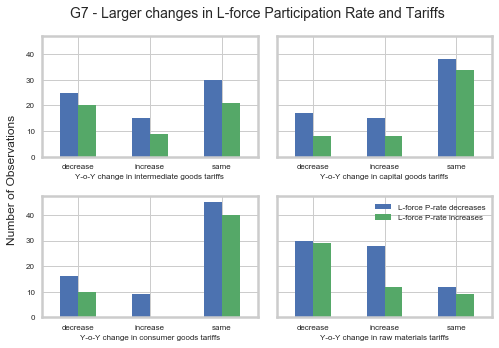

In [65]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharey = True)
economicbar(lforce_g7, "lforce2_cat")

plt.legend(bbox_to_anchor=(1,1))
plt.legend(labels=mylabels)
plt.tight_layout()

fig.text(0, 0.5, 'Number of Observations', va='center', rotation='vertical', size = 12)
fig.suptitle("G7 - Larger changes in L-force Participation Rate and Tariffs ", size = 14)
fig.subplots_adjust(top=0.9)